# Análisis Exploratorio de Datos (EDA)

    Se buscará, a través del EDA, patrones que brinden información necesaria para lograr disminuir las víctimas fatales en accidentes viales.

In [66]:
#IMPORTACIONES
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
import utils


import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Se observa dos pestañas en Data, formato .xlsx; por un lado HECHOS y por otro VICTIMAS (con sus respectivos diccionarios)

### PESTAÑA: HECHOS

In [2]:
df_hechos = pd.read_excel('../data/homicidios.xlsx', sheet_name='HECHOS')
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [3]:
#Informacion General
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [4]:
#Estandarización de columanas a formato: 'Mmmm', y modificación de nombres en caso de ser necesario.
# Primer letra en mayúscula
df_hechos.columns = [x.capitalize() for x in df_hechos.columns]
# Reemplazo de guiones por espacios
df_hechos.columns = df_hechos.columns.str.replace('_', ' ')
# Renombre de columnas
df_hechos = df_hechos.rename(columns={'N victimas': 'Cantidad víctimas',
                                                    'Aaaa':'Año',
                                                    'Mm':'Mes',
                                                    'Dd':'Día',
                                                    'Hh':'Hora entera',
                                                    'Xy (caba)':'XY (CABA)',
                                                    'Victima': 'Víctima'})
df_hechos.columns

Index(['Id', 'Cantidad víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora entera', 'Lugar del hecho', 'Tipo de calle', 'Calle', 'Altura',
       'Cruce', 'Dirección normalizada', 'Comuna', 'XY (CABA)', 'Pos x',
       'Pos y', 'Participantes', 'Víctima', 'Acusado'],
      dtype='object')

#### Nulos

* Altura 129 non-null de 696

In [5]:
#Visualización de Nulos en 'Altura'. Se evalua con 'Direccion Normalizada' y 'Lugar del Hecho'

df_nulos_hechos_altura = df_hechos[['Altura', 'Lugar del hecho', 'Dirección normalizada']]
df_nulos_hechos_altura.head(10)


,Altura,Lugar del hecho,Dirección normalizada
0,NaN,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G..."
1,NaN,AV GRAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
2,2034.0,AV ENTRE RIOS 2034,ENTRE RIOS AV. 2034
3,NaN,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL."
4,NaN,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES."
5,NaN,AV 27 DE FEBRERO Y AV ESCALADA,27 DE FEBRERO AV. y ESCALADA AV.
6,NaN,NOGOYA Y JOAQUIN V. GONZALES,"NOGOYA y GONZALEZ, JOAQUIN V."
7,NaN,AV GENERAL PAZ Y AV DE LOS CORRALES,"PAZ, GRAL. AV. y DE LOS CORRALES AV."
8,NaN,AV BELGRANO Y BERNARDO DE IRIGOYEN,"BELGRANO AV. e IRIGOYEN, BERNARDO DE"
9,1366.0,AV ENTRE RIOS 1366,ENTRE RIOS AV. 1366


In [6]:
#Al contar con datos en 'Direccion Normalizada' y/o 'Lugar del Hecho', elimino la columna
df_hechos = df_hechos.drop('Altura', axis=1)

* Cruce 525 non-null de 696

In [7]:
#Visualización de nulos en 'Cruce'. Se evaua 'Lugar del hecho' y 'Tipo de calle'
df_nulos_hechos_cruce =  df_hechos[['Cruce', 'Lugar del hecho', 'Tipo de calle']]
df_nulos_hechos_cruce.head(10)

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
2,NaN,AV ENTRE RIOS 2034,AVENIDA
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA


In [8]:
#Resulta interesante para evaluar si los hechos ocurren en esquinas o en algún punto de la cuadra
# Se visualizan los nulos en Cruce
df_nulos_hechos_cruce[df_nulos_hechos_cruce['Cruce'].isnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:10]

,Cruce,Lugar del hecho,Tipo de calle
2,NaN,AV ENTRE RIOS 2034,AVENIDA
9,NaN,AV ENTRE RIOS 1366,AVENIDA
14,NaN,SUIPACHA 156,CALLE
33,NaN,LIMA 1483,CALLE
35,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
42,NaN,AV LUIS MARIA CAMPOS 30,AVENIDA
43,NaN,LIMA 1471,CALLE
50,NaN,MAGARIÑOS CERVANTES 3900,CALLE
59,NaN,AV LA PLATA 2384,AVENIDA


In [9]:
#Se visualizan los valores NO nulos de 'Cruce' con 'Lugar del hecho' y 'Tipo de calle'
df_nulos_hechos_cruce[df_nulos_hechos_cruce['Cruce'].notnull()][['Cruce', 'Lugar del hecho', 'Tipo de calle']][:10]

,Cruce,Lugar del hecho,Tipo de calle
0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA
1,DE LOS CORRALES AV.,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
3,"VILLEGAS, CONRADO, GRAL.",AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA
4,"SAENZ PE?A, LUIS, PRES.",AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA
5,ESCALADA AV.,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA
6,"GONZALEZ, JOAQUIN V.",NOGOYA Y JOAQUIN V. GONZALES,CALLE
7,DE LOS CORRALES AV.,AV GENERAL PAZ Y AV DE LOS CORRALES,GRAL PAZ
8,"IRIGOYEN, BERNARDO DE",AV BELGRANO Y BERNARDO DE IRIGOYEN,AVENIDA
10,VERA,AV SCALABRINI ORTIZ Y VERA,AVENIDA
11,"QUINQUELA MARTIN, BENITO",AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA


In [10]:
#Se visualiza que los valores nulos de las muestras son para casos que no son intersecciones de calle y/o avenidas
#Renombro la columna a 'Intersección" y posteriormente coloco como contenido SI o NO
df_hechos.rename(columns={'Cruce': 'Interseccion'}, inplace=True)

In [11]:
#Reemplazo valores no nulos por "no" y los nulos por "si"
df_hechos['Interseccion'] = np.where(df_hechos['Interseccion'].notnull(), 'SI', 'NO')

* Dirección Normalizada  688 non-null de 696

In [12]:
df_hechos[df_hechos['Dirección normalizada'].isnull()][['Dirección normalizada', 'Lugar del hecho', 'Tipo de calle']][:10]

,Dirección normalizada,Lugar del hecho,Tipo de calle
38,NaN,AUTOPISTA LUGONES PK 10000,AUTOPISTA
106,NaN,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA
119,NaN,SD,CALLE
180,NaN,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA
181,NaN,AU DELLEPIANE 2400,AUTOPISTA
313,NaN,AUTOPISTA LUGONES KM 4.7,AUTOPISTA
546,NaN,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA
621,NaN,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA


In [13]:
#NO se visualiza información para rellenar los campos. Se completan con SD (Sin dato)
df_hechos['Dirección normalizada'].fillna("SD", inplace=True)

#### Duplicados

In [14]:
#Se verifica en columna Id
print(f"La columna 'Id' cuenta con {len(df_hechos['Id'].unique())} valores únicos.")

La columna 'Id' cuenta con 696 valores únicos.


#### Variables

In [15]:
#Reutilizo modulo utils.py de PI 1

utils.types_data_df(df_hechos)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.00,0.00,0
1,Cantidad víctimas,[<class 'int'>],100.00,0.00,0
2,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
3,Año,[<class 'int'>],100.00,0.00,0
4,Mes,[<class 'int'>],100.00,0.00,0
5,Día,[<class 'int'>],100.00,0.00,0
6,Hora,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,0.00,0
7,Hora entera,"[<class 'int'>, <class 'str'>]",100.00,0.00,0
8,Lugar del hecho,[<class 'str'>],100.00,0.00,0
9,Tipo de calle,[<class 'str'>],100.00,0.00,0


In [16]:
#Se visualizan 3 columnas con más de un dato: 'Hora', 'Hora entera', 'Calle'

* Hora

In [17]:
# Cantidad de valores por tipo de dato en la columna 'Hora'
df_hechos['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

In [18]:
# Modifico tipo de dato al de mayor cantidad
df_hechos['Hora'] = df_hechos['Hora'].apply(lambda x: utils.convert_to_datatime(x))
# Se verifica la cantidad de valores por tipo de dato en la columna 'hora'
print('Tipos de datos:')
print(df_hechos['Hora'].apply(type).value_counts())
print('Registro con NoneType:')
df_hechos[df_hechos['Hora'].isna()]

Tipos de datos:
Hora
<class 'datetime.time'>    695
<class 'NoneType'>           1
Name: count, dtype: int64
Registro con NoneType:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,None,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [19]:
# Hay un solo dato NoneType. Se reemplaza con el valor de la Moda para la columna 'Hora'ArithmeticError# calcula la hora mas común
hora_moda = df_hechos['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')
# Se reemplaza el valor None por la hora más común
df_hechos['Hora'].fillna(hora_moda, inplace=True)
# se verifica el tipo de dato para la columna
df_hechos['Hora'].apply(type).value_counts()

La hora mas común es: 09:00:00


Hora
<class 'datetime.time'>    696
Name: count, dtype: int64

* Hora Entera

In [20]:
# Se verifica el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    695
<class 'str'>      1
Name: count, dtype: int64

In [21]:
# Se imputa la hora moda al dato faltante, visualizado en el mismo caso que para Hora como SD
df_hechos['Hora entera'] = df_hechos['Hora entera'].apply(lambda x: int(hora_moda.hour) if x == "SD" else x)
# Se verifica el tipo de dato
df_hechos['Hora entera'].apply(type).value_counts()

Hora entera
<class 'int'>    696
Name: count, dtype: int64

* Calle

In [22]:
# Se verifica el tipo de dato
print('Tipos de datos:')
print(df_hechos['Calle'].apply(type).value_counts())
# Se observa el registro con tipo de dato float
print('Registro con tipo float:')
df_hechos[df_hechos['Calle'].apply(lambda x: isinstance(x, float))]

Tipos de datos:
Calle
<class 'str'>      695
<class 'float'>      1
Name: count, dtype: int64
Registro con tipo float:


,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [23]:
#Se observa que no se cuenta con el dato de la calle, se decide imputar 'SD' a este valor faltante.

# Se imputa SD al dato faltante
df_hechos['Calle'].fillna('SD', inplace=True)
# Verifico
df_hechos[df_hechos['Id']=='2016-0151']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD


#### Categorias XY CABA Pos X y PosY


In [24]:
#Se visualizan faltantes en ambas. Se verifica
df_hechos[df_hechos['XY (CABA)']=='Point (. .)']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NO,SD,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NO,SD,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,SD,NO,SD,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NO,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NO,SD,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,SD,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NO,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS


In [25]:
#Existen 14 registros que no presentan las coordenadas planas del hecho y también 10 registros que tampoco presentan los datos 'Pos x' y 'Pos y'.
# Se buscó información que permitiera completar estos datos, pero al momento de cierre del presente informe aún no se encontró. 
# Para continuar con el análsis se imputarán 0 de modo tal que sirva para excluir el valor en el dashboard a realizar.


# Se reemplazan los valores faltantes por 0
df_hechos['Pos x'] = df_hechos['Pos x'].replace('.', 0)
df_hechos['Pos y'] = df_hechos['Pos y'].replace('.', 0)
df_hechos['XY (CABA)'] = df_hechos['XY (CABA)'].replace('Point (. .)', 0)

#### Categorias Victima y Acusado

In [26]:
#Se constata con diccionario aportado en Dataset:
df_hechos['Víctima'].unique()


array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [27]:
df_hechos['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [28]:
#En 'Víctima' existen dos categorías Objeto fijo y Peatón moto que no están en el diccionario de datos. 
# Se observan estos registros

df_hechos[df_hechos['Víctima'].isin(['OBJETO FIJO', 'PEATON_MOTO'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO


In [29]:
#Dado que son solo 2 registros, reemplazo por 'Otro' com indica el diccionario
df_hechos['Víctima'] = df_hechos['Víctima'].replace({'OBJETO FIJO':'OTRO', 'PEATON_MOTO':'OTRO'})
# Se verifican esos cambios
df_hechos[df_hechos['Id'].isin(['2017-0108', '2020-0063'])]

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
230,2017-0108,2,2017-09-02,2017,9,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y MACHAIN",12,Point (97098.48468623 109019.96106626),-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OTRO,AUTO
583,2020-0063,2,2020-12-05,2020,12,5,07:10:00,7,NUEVA YORK Y ALTA GRACIA,CALLE,NUEVA YORK,SI,NUEVA YORK y ALTA GRACIA,11,Point (94080.62190808 102083.62453795),-58.52783814,-34.61047001,PEATON_MOTO-MOTO,OTRO,MOTO


## Pestaña: VICTIMAS


In [30]:
df_victimas = pd.read_excel('../data/homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [31]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [32]:
#Estandarización de columanas a formato: 'Mmmm', y modificación de nombres en caso de ser necesario.
# Primer letra en mayúscula
df_victimas.columns = [x.capitalize() for x in df_victimas.columns]
# Se reemplazan los guiones por espacios
df_victimas.columns = df_victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_victimas = df_victimas.rename(columns={ 
                                            'Id hecho' : 'Id',
                                            'Aaaa':'Año',
                                            'Mm':'Mes',
                                            'Dd':'Día',
                                            'Victima':'Víctima'
                                         })
                                            

In [33]:
df_victimas.head()

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


#### Nulos

In [34]:
#No hay datos nulos, segun .info(); se verifica:
df_victimas.isna().any().any()

False

#### Duplicados

In [35]:
# Se verifica existencia de filas duplicadas
df_victimas[df_victimas.duplicated()]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento


In [36]:
#Se verifican Id Duplicados
duplicados = df_victimas.duplicated(subset=['Id'], keep=False)

# Mostrar las filas que tienen duplicados en la columna 'ID'
filas_con_duplicados = df_victimas[duplicados]
filas_con_duplicados

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
29,2016-0041,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
176,2017-0036,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29 00:00:00


In [37]:
#Los duplicados, corresponden a distintas victimas para el mismo accidente

#### Variables

In [38]:
utils.types_data_df(df_victimas)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Id,[<class 'str'>],100.0,0.0,0
1,Fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,0.0,0
2,Año,[<class 'int'>],100.0,0.0,0
3,Mes,[<class 'int'>],100.0,0.0,0
4,Día,[<class 'int'>],100.0,0.0,0
5,Rol,[<class 'str'>],100.0,0.0,0
6,Víctima,[<class 'str'>],100.0,0.0,0
7,Sexo,[<class 'str'>],100.0,0.0,0
8,Edad,"[<class 'int'>, <class 'str'>]",100.0,0.0,0
9,Fecha fallecimiento,"[<class 'datetime.datetime'>, <class 'str'>]",100.0,0.0,0


* Edad:

In [39]:
# Cantidad de valores por tipo de dato en la columna 'edad'
tipos_datos = df_victimas['Edad'].apply(type).value_counts()
print(tipos_datos)


Edad
<class 'int'>    664
<class 'str'>     53
Name: count, dtype: int64


In [40]:
#Verifico por cada elemento de Edad, los 53 elementos str
df_victimas[df_victimas['Edad'].apply(lambda x: isinstance(x, str))]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


In [41]:
#Se completaran los valores SD con la mas frecuente, pero tambien asociada al genero
#Vemos que tambien tiene faltantes, por lo que se completa:

# Nombre de la columna en la que se imputará el valor más frecuente
columna_imputar_valor_frecuente = 'Sexo'
# Reemplazar 'SD' con NaN en la columna 'Sexo'
df_victimas[columna_imputar_valor_frecuente] = df_victimas[columna_imputar_valor_frecuente].replace('SD', pd.NA)
# Calcular el valor más frecuente en la columna 'Sexo'
valor_mas_frecuente = df_victimas[columna_imputar_valor_frecuente].mode().iloc[0]
# Llenar los valores NaN en la columna 'Sexo' con el valor más frecuente
df_victimas[columna_imputar_valor_frecuente].fillna(valor_mas_frecuente, inplace=True)

# Imputar edad promedio según el género
df_victimas['Edad'] = df_victimas['Edad'].replace('SD', pd.NA)
promedio_por_genero = df_victimas.groupby('Sexo')['Edad'].transform('mean')
df_victimas['Edad'] = df_victimas['Edad'].fillna(promedio_por_genero).astype(int)



In [42]:
#Verifico con algunos ejemplos:
victimas_id_ej = ['2016-0045', '2016-0048', '2016-0049']
df_victimas[df_victimas['Id'].isin(victimas_id_ej)]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,50,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,MASCULINO,39,SD


* Rol y Victima

In [43]:
# Se desprende que 'Rol' y 'Victima' tienen datos SD.
print('Rol:', len(df_victimas[df_victimas['Rol']=='SD']))
print('Victima: ', len(df_victimas[df_victimas['Víctima']=='SD']))

Rol: 11
Victima:  9


In [44]:
#Dado que son poca cantidad, se reemplaza SD con el valor mas frecuente


# Nombre de la columna en la que se imputará el valor más frecuente
columna_imputar_valor_frecuente_Rol = 'Rol'
# Reemplazar 'SD' con NaN 
df_victimas[columna_imputar_valor_frecuente_Rol] = df_victimas[columna_imputar_valor_frecuente_Rol].replace('SD', pd.NA)
# Calcular el valor más frecuente
valor_mas_frecuente = df_victimas[columna_imputar_valor_frecuente_Rol].mode().iloc[0]
#imprimo valor mas frecuente
print(valor_mas_frecuente)
# Llenar los valores NaN con el valor más frecuente
df_victimas[columna_imputar_valor_frecuente_Rol].fillna(valor_mas_frecuente, inplace=True)

CONDUCTOR


In [45]:
# Nombre de la columna en la que se imputará el valor más frecuente
columna_imputar_valor_frecuente_vic = 'Víctima'
# Reemplazar 'SD' con NaN 
df_victimas[columna_imputar_valor_frecuente_vic] = df_victimas[columna_imputar_valor_frecuente_vic].replace('SD', pd.NA)
# Calcular el valor más frecuente
valor_mas_frecuente = df_victimas[columna_imputar_valor_frecuente_vic].mode().iloc[0]
#imprimo valor mas frecuente
print(valor_mas_frecuente)
# Llenar los valores NaN con el valor más frecuente
df_victimas[columna_imputar_valor_frecuente_vic].fillna(valor_mas_frecuente, inplace=True)

MOTO


In [46]:
#Verifico
victimas_id_ej = ['2016-0045', '2016-0048', '2016-0049']
df_victimas[df_victimas['Id'].isin(victimas_id_ej)]

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha fallecimiento
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,39,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,50,SD
36,2016-0049,2016-04-17,2016,4,17,CONDUCTOR,MOTO,MASCULINO,39,SD


#### Fecha Fallecimiento

In [47]:
#Se observa tipo datatime y SD. Como el objetivo del analisis no compromete la Fecha de Fallecimiento (sino reducir victimas), se elimina
df_victimas = df_victimas.drop('Fecha fallecimiento', axis=1)
df_victimas.head(3)

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


## MERGE df_hechos + df_victimas

In [48]:
#Se realizará un merge entre ambos DF, para un solo dataset. Por tal, se pueden eliminar las columnas 
#'Fecha', 'Año', 'Mes', 'Día' y 'Víctima', porque es la misma información. Se verifica:
df_hechos[df_hechos['Id']=='2016-0001']

,Id,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO


In [49]:
df_victimas[df_victimas['Id']=='2016-0001']

,Id,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19


In [50]:
# Se eliminan las columnas repetidas
df_victimas = df_victimas.drop(['Fecha', 'Año', 'Mes', 'Día', 'Víctima'], axis=1)
df_victimas.columns

Index(['Id', 'Rol', 'Sexo', 'Edad'], dtype='object')

In [51]:
#MERGE
df_homicidios = df_victimas.merge(df_hechos, on='Id', how='left')
df_homicidios.head()

,Id,Rol,Sexo,Edad,Cantidad víctimas,Fecha,Año,Mes,Día,Hora,...,Calle,Interseccion,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
0,2016-0001,CONDUCTOR,MASCULINO,19,1,2016-01-01,2016,1,1,04:00:00,...,PIEDRA BUENA AV.,SI,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70,1,2016-01-02,2016,1,2,01:15:00,...,"PAZ, GRAL. AV.",SI,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30,1,2016-01-03,2016,1,3,07:00:00,...,ENTRE RIOS AV.,NO,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18,1,2016-01-10,2016,1,10,00:00:00,...,LARRAZABAL AV.,SI,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,1,2016-01-21,2016,1,21,05:20:00,...,SAN JUAN AV.,SI,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [52]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     717 non-null    object        
 1   Rol                    717 non-null    object        
 2   Sexo                   717 non-null    object        
 3   Edad                   717 non-null    int32         
 4   Cantidad víctimas      717 non-null    int64         
 5   Fecha                  717 non-null    datetime64[ns]
 6   Año                    717 non-null    int64         
 7   Mes                    717 non-null    int64         
 8   Día                    717 non-null    int64         
 9   Hora                   717 non-null    object        
 10  Hora entera            717 non-null    int64         
 11  Lugar del hecho        717 non-null    object        
 12  Tipo de calle          717 non-null    object        
 13  Calle

## DATOS VISUALIZADOS EN GRAFICOS

* ### Cantidad de accidentes con victimas fatales, mensualmente con evolución anual

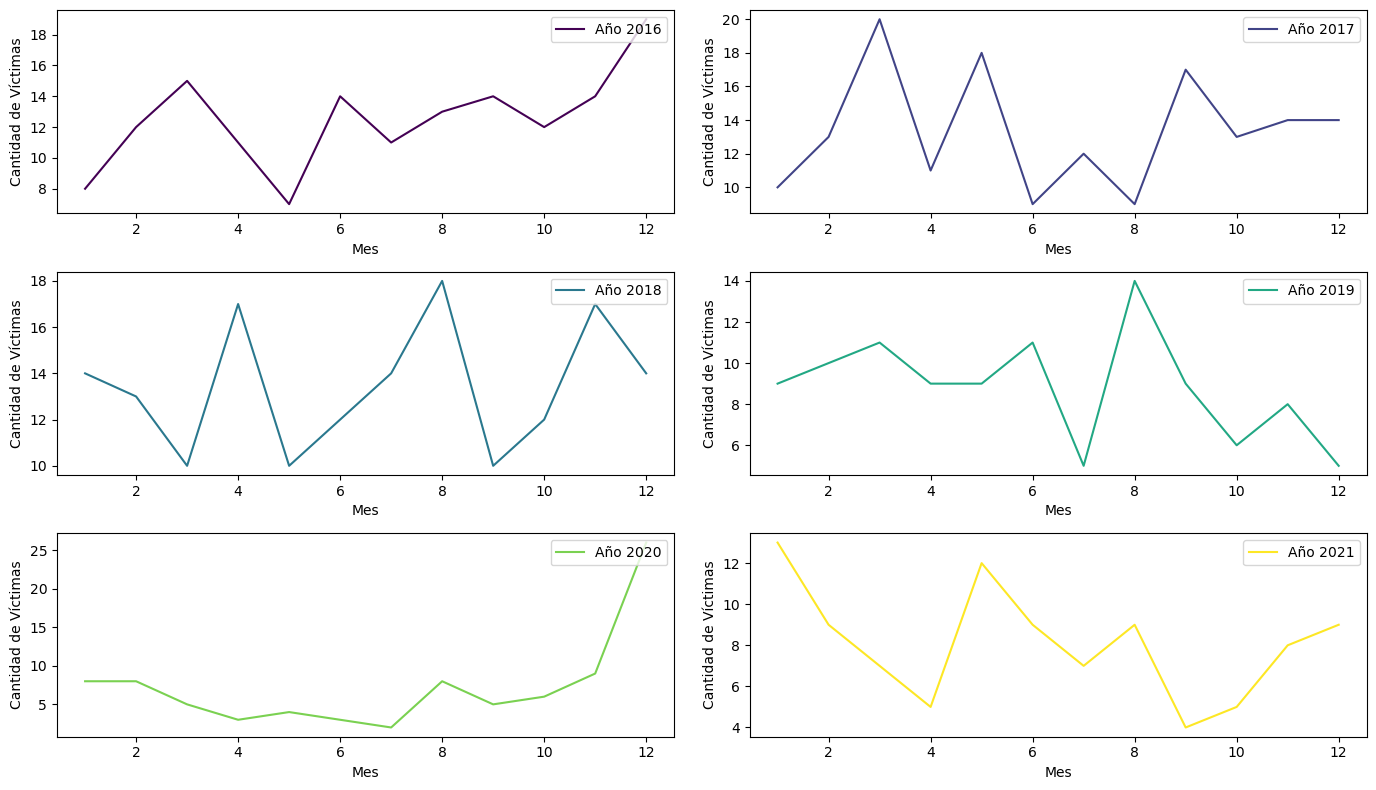

In [55]:
utils.accidentes_x_mes_x_año(df_homicidios)

No se puede determinar la existencia de algun patron en la observacion de las gráficas (la mayor cantidad de victimas, no se da siempre en los mismos meses). Sí es notable, la disminución de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con las medidas de cuarentena por la pandemia COVID-19.



* ### Cantidad de victimas fatales mensuales, en el global de los años

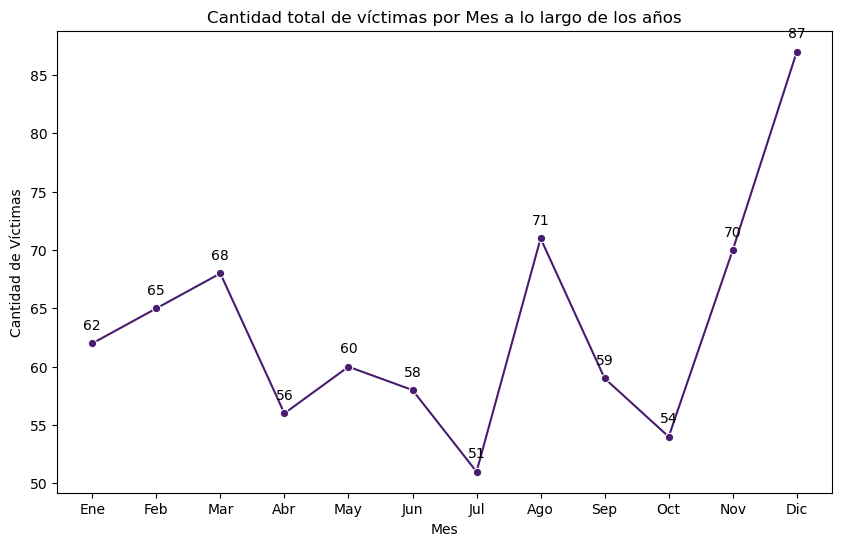

In [72]:
utils.victimas_x_mes_total_años(df_homicidios)

En esta gráfica se puede observar que a lo largo de todos los años analizados, los meses con más cantidad de victimas son:
* 1° Diciembre
* 2° Agosto
* 3° Noviembre

Y los que menos victimas cuentan:
* 3° Abril
* 2° Octubre
* 1° Julio

* ### Cantidad de victimas por dia de la semana, en el global de los años

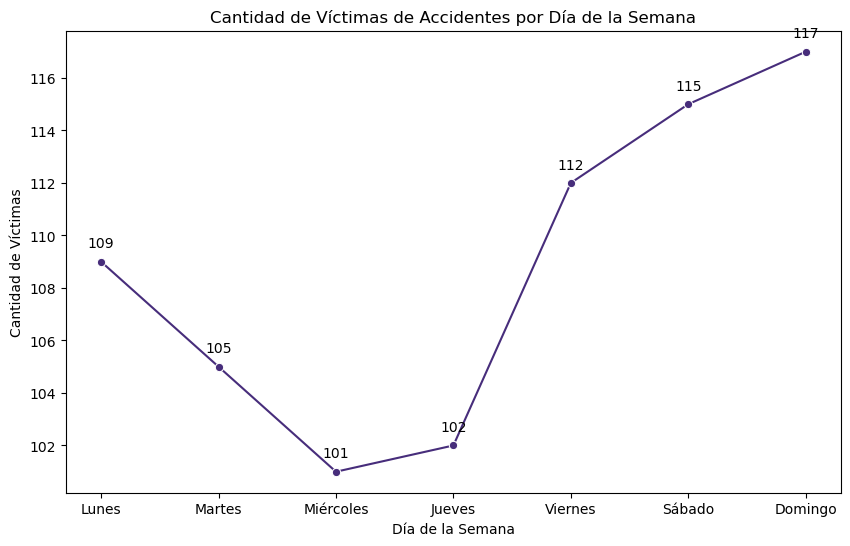

In [61]:
utils.victimas_x_dia_semana_años(df_homicidios)

* ### Accidentes por Hora, a lo largo del dia en el global de años

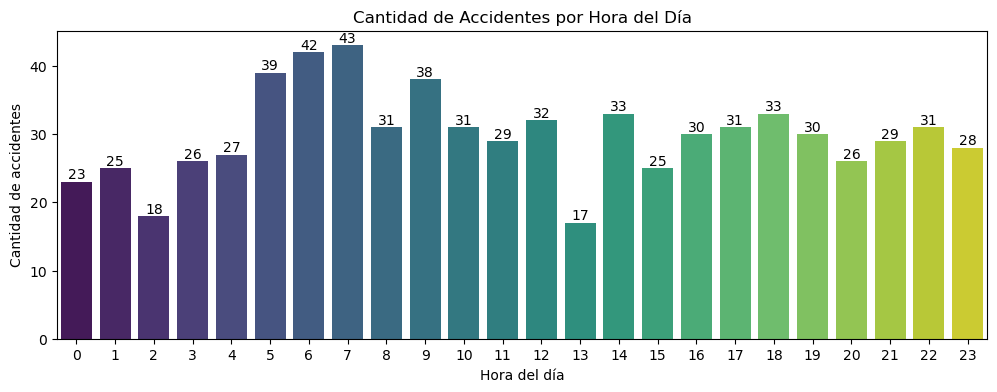

In [71]:
utils.accidentes_x_hora_diario(df_homicidios)

Se visualiza el horario entre las 5 a las 8 de la mañana como el de mayor cantidad de accidentes; siendo las 13, 02 y 00 hs como las de menor cantidad
